In [1]:
include("../src/include_file.jl")

diffusion_a_priori (generic function with 1 method)

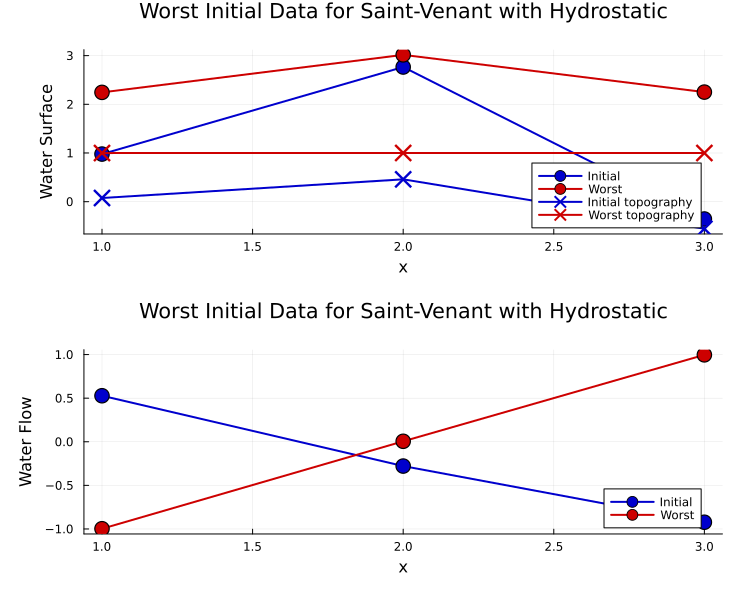

Worst value found for epsilon : -2.759942436189446


In [2]:
Nx = 50
CFL_factor = 0.5
#topoHeight = 2.0
eq = SaintVenant(bump_zb(), 1e-10)

method = createHydrostatic(CFL_factor, Rusanov)
#method = Rusanov(CFL_factor)

boxBounds=[0.0 3;-1.0 1.0]
sourceBounds=[-1.0, 1.0]

sol = iterate_WID(Nx, eq, method; nb_it=1, boxBounds=boxBounds, sourceBounds=sourceBounds)

plotWorstWD(sol, eq)#, SaveMode())

In [4]:
# Reconstruction of the initial data from the optimization results
u_init, z = extendInitialDataToK(sol, Nx)

([1.633345180136835 0.5012665216705963; 1.633345180136835 0.5012665216705963; … ; 1.633345180136835 0.5012665216705963; 1.633345180136835 0.5012665216705963], [0.999763197507461; 0.999763197507461; … ; 0.999763197507461; 0.999763197507461;;])

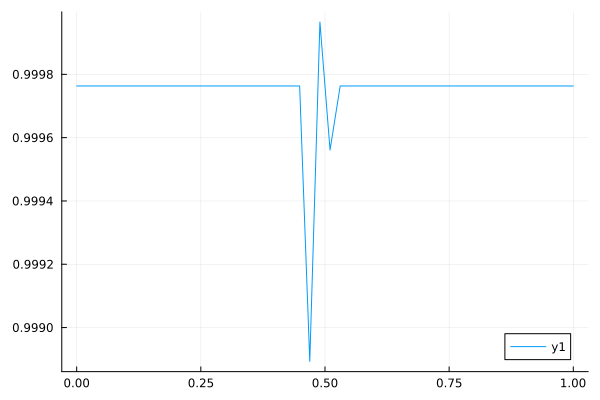

In [7]:
plot(domain.x, z)

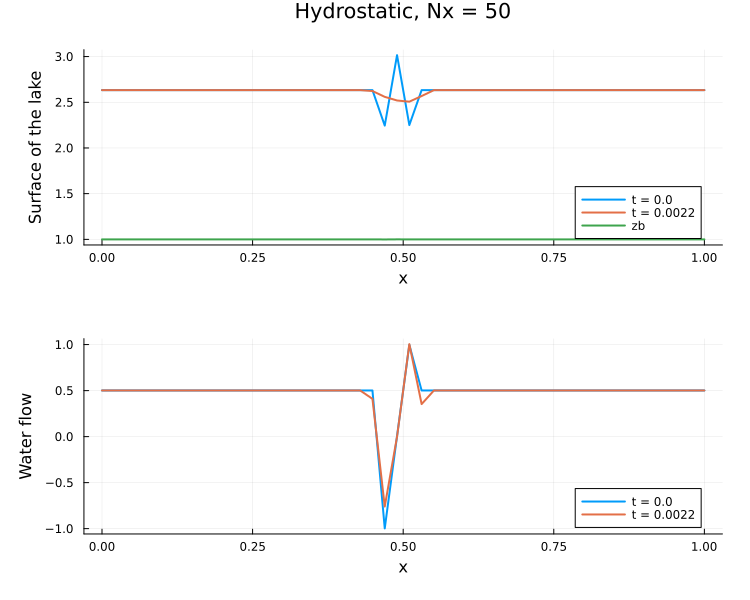

nothing

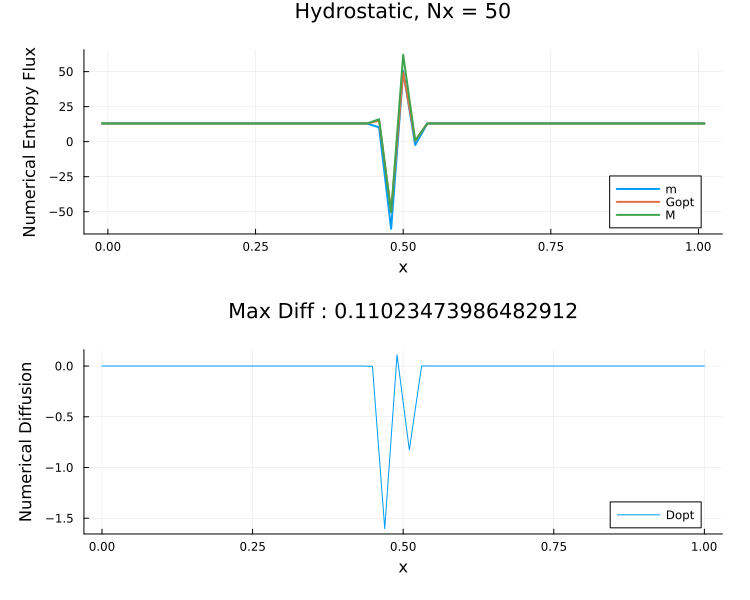

nothing

sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:368 =#
                J(optimFunctional, gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: success

 * Candidate solution
    Final objective value:     1.036461e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   5  (vs limit Inf)
    Iterations:    28040
    f(x) calls:    31780

Maximal diffusion value : 0.11023473986482912


In [6]:
# Now we would like to solve the equation for one timestep only - the same that was used during the WID research

domain = createUnitInterval(Nx, 0.0, 0.1)
dt = sol.method.CFL_factor * domain.dx / CFL_cond(sol.equation, u_init) # Timestep given by CFL condition

# Redefining the domain with dt as final time
domain = createUnitInterval(Nx, 0.0, dt)
domain.sourceVec = z

# Solving Saint-Venant for this data
fv_sol = fv_solve(domain, u_init, eq, method)
display(plot_fv_sol(fv_sol, eq, nb_plots=2))

# Optimization process

solEnt = optimize_for_entropy(u_init, domain, eq, method; iterations=100000)#, modifiedDataType=maxK())
display(plot_solution(solEnt))

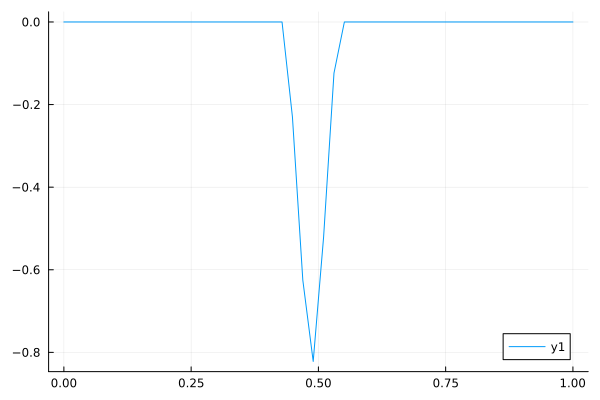

In [8]:
D_low, D_up = diffusion_a_priori(u_init, domain, eq, method)
plot(domain.x, D_low)

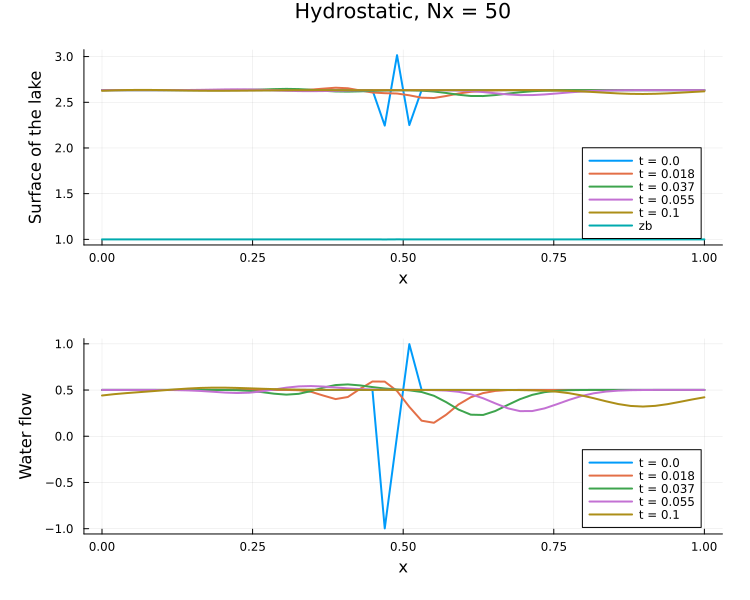

nothing

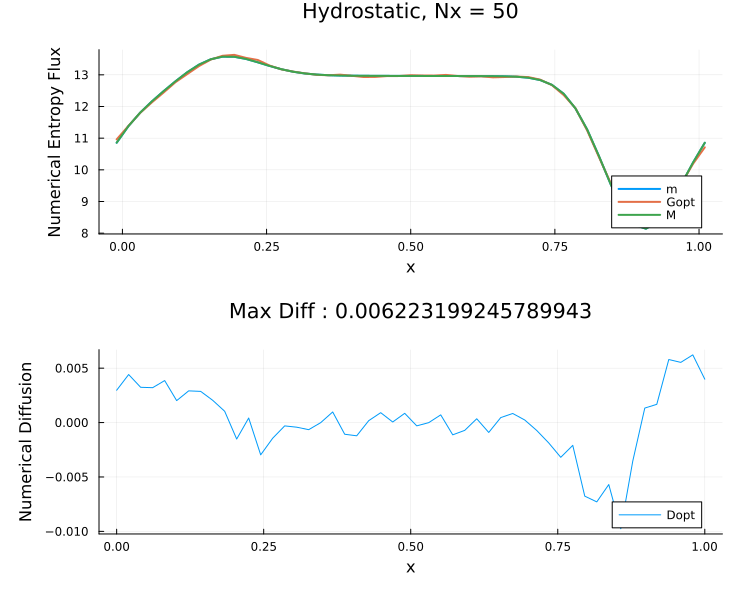

nothing

sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:368 =#
                J(optimFunctional, gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     1.000310e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    1618

Maximal diffusion value : 0.006223199245789943


In [9]:
domain = createUnitInterval(Nx, 0.0, 0.1)
domain.sourceVec = z

# Solving Saint-Venant for this data
fv_sol = fv_solve(domain, u_init, eq, method)
display(plot_fv_sol(fv_sol, eq, nb_plots=5))

# Optimization process

solEnt = optimize_for_entropy(u_init, domain, eq, method)#, modifiedDataType=maxK())
display(plot_solution(solEnt))

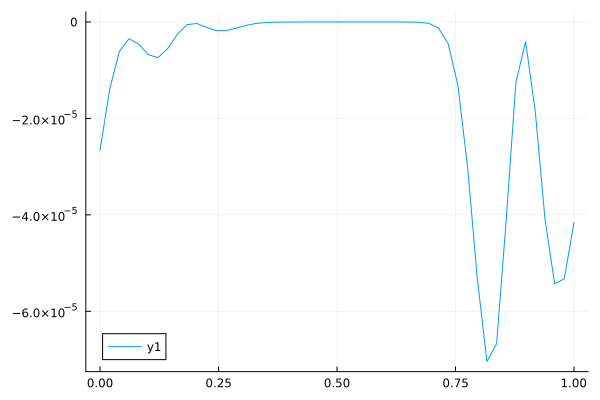

In [10]:
D_low, D_up = diffusion_a_priori(u_init, domain, eq, method)
plot(domain.x, D_low)